<a href="https://colab.research.google.com/github/fabitaInes/grupo2/blob/main/proyecto_advertising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Modelos de Predicción de los ingresos monetarios de una campaña de Marketing Digital**



**Análisis de los datos**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [ ]:
dataset = pd.read_csv('AD-Tech.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567291 entries, 0 to 567290
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date                     567291 non-null  object 
 1   site_id                  567291 non-null  int64  
 2   ad_type_id               567291 non-null  int64  
 3   geo_id                   567291 non-null  int64  
 4   device_category_id       567291 non-null  int64  
 5   advertiser_id            567291 non-null  int64  
 6   order_id                 567291 non-null  int64  
 7   line_item_type_id        567291 non-null  int64  
 8   os_id                    567291 non-null  int64  
 9   integration_type_id      567291 non-null  int64  
 10  monetization_channel_id  567291 non-null  int64  
 11  ad_unit_id               567291 non-null  int64  
 12  total_impressions        567291 non-null  int64  
 13  total_revenue            567291 non-null  float64
 14  view

Determinacion de que variables estan fuertemente correlacionadas

In [ ]:
# obteniendo los tipos de datos del dataset
list(set(dataset.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64')]

In [ ]:
# seleccionamos solo los de tipo float64 y int64
dataset_num = dataset.select_dtypes(include = ['float64', 'int64'])
dataset_num.head()

,site_id,ad_type_id,geo_id,device_category_id,advertiser_id,order_id,line_item_type_id,os_id,integration_type_id,monetization_channel_id,ad_unit_id,total_impressions,total_revenue,viewable_impressions,measurable_impressions,revenue_share_percent
0,351,10,187,2,84,3473,19,60,1,4,5174,16,0.0,2,16,1
1,351,10,187,2,84,3473,19,58,1,4,5174,6,0.0,0,6,1
2,351,10,147,2,84,3473,19,60,1,4,5174,4,0.0,0,4,1
3,351,10,147,2,84,3473,19,58,1,4,5174,4,0.0,0,4,1
4,348,10,147,3,79,3463,20,59,1,19,5138,4,0.0,0,4,1


Tratar de determinar que variables estan fuertemente correlacionadas con las variables total_impressions y total_revenue. Seran almacenadas en la variable llamada golden_features_list. Se reutilizara dataset_num.

In [ ]:
df_num_cor = dataset_num.corr()['total_revenue'][:-1]
golden_features_revenue_list = df_num_cor[abs(df_num_cor) > 0.5].sort_values(ascending=False)
print("Hay {} variables fuertemente correlacionadas con la variable total_revenue:\n{}".format(len(golden_features_revenue_list), golden_features_revenue_list))

Hay 4 variables fuertemente correlacionadas con la variable total_revenue:
total_revenue             1.000000
viewable_impressions      0.742076
measurable_impressions    0.732053
total_impressions         0.730177
Name: total_revenue, dtype: float64


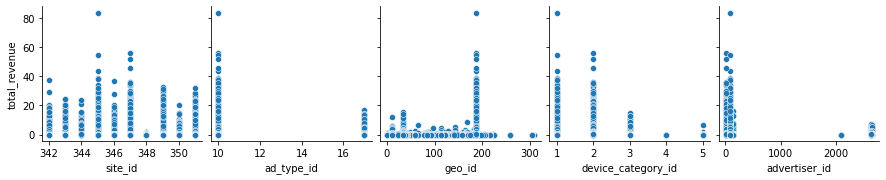

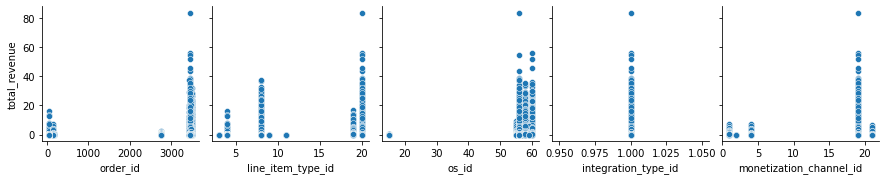

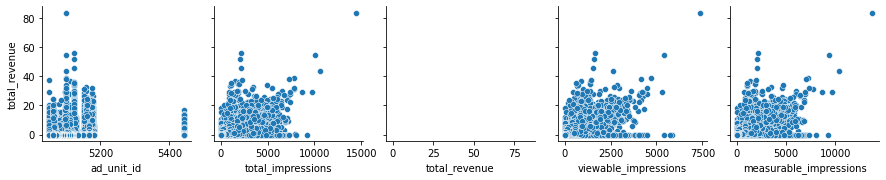

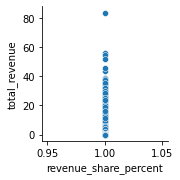

In [ ]:
for i in range(0, len(dataset_num.columns), 5):
    sns.pairplot(data=dataset_num,
                x_vars=dataset_num.columns[i:i+5],
                y_vars=['total_revenue'])
plt.show()

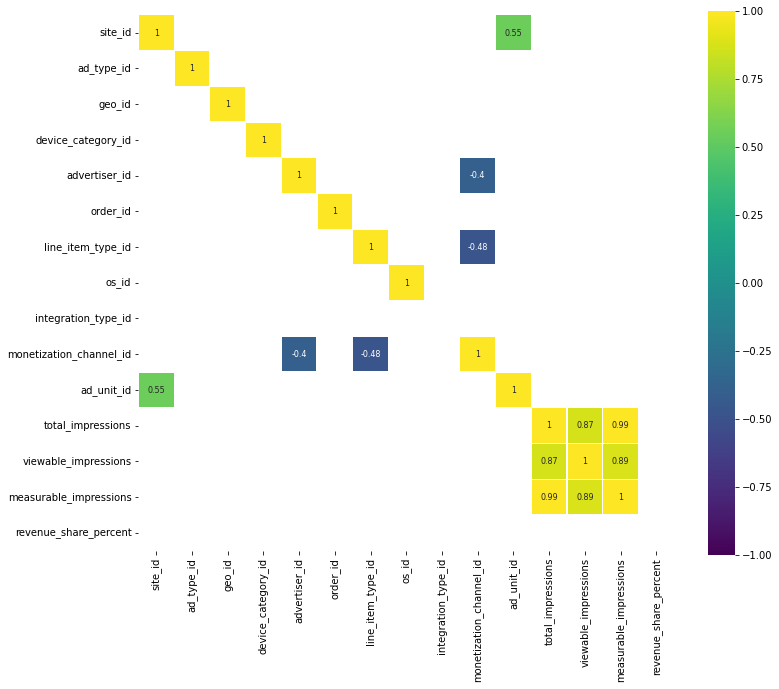

In [ ]:
# Matriz de correlacion que muestra que variables estan fuertemente correlacionadas
# relacion de todas las variables con todas las variables

corr = dataset_num.drop('total_revenue', axis=1).corr() # ya se examino la correlacion de total_revenue
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

**Modelos de Prediccion**


**Modelo de Regresion Lineal de solo una variable**

In [ ]:
dt = dataset[['total_impressions','viewable_impressions','measurable_impressions','total_revenue']]
dt.head(10)

,total_impressions,viewable_impressions,measurable_impressions,total_revenue
0,16,2,16,0.0
1,6,0,6,0.0
2,4,0,4,0.0
3,4,0,4,0.0
4,4,0,4,0.0
5,2,0,2,0.0
6,2,2,2,0.0
7,2,2,2,0.0
8,80,80,80,0.0
9,92,92,92,0.0


In [ ]:
#Seleccionamos las columnas 0 del dataset para x
X = dt.iloc[:, 0:1].values
#Seleccionamos la columna 3 del dataset para y
y = dt.iloc[:, 3:4].values

In [ ]:
#Spliting Data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
#Training Linear Regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
Lrr_model =regressor.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error
y_train_pred=regressor.predict(X_train)

print('Train')
print('R2 Score:',r2_score(y_train,y_train_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(y_train,y_train_pred))

y_test_pred=regressor.predict(X_test)

print('\n\nTest')
print('R2 Score:',r2_score(y_test,y_test_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_test_pred)))
print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(y_test,y_test_pred))

Train
R2 Score: 0.5212337383427081
Root Mean Squared Error: 0.498150058286936
Mean Absolute Percentage Error: 52743336667764.54


Test
R2 Score: 0.5854392482749792
Root Mean Squared Error: 0.44275549977538664
Mean Absolute Percentage Error: 48408744556474.54


In [ ]:
print('DATOS DEL MODELO REGRESIÓN LINEAL DE SOLO UNA VARIABLE')
print()
print('Valor de las pendientes o coeficientes "a":')
print(regressor.coef_)
print('Valor de la intersección o coeficiente "b":')
print(regressor.intercept_)
print('Precisión del modelo:')
print(regressor.score(X_train, y_train))

DATOS DEL MODELO REGRESIÓN LINEAL DE SOLO UNA VARIABLE

Valor de las pendientes o coeficientes "a":
[[0.00236205]]
Valor de la intersección o coeficiente "b":
[-0.00952573]
Precisión del modelo:
0.5212337383427081


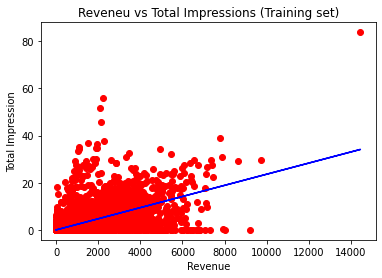

In [ ]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, Lrr_model.predict(X_train), color = 'blue')
plt.title('Reveneu vs Total Impressions (Training set)')
plt.xlabel('Revenue')
plt.ylabel('Total Impression')
plt.show()

**Modelo de Regresion Lineal de varias variables**

In [ ]:
#Seleccionamos las columna 0, 1 y 2 del dataset
X_multiple = dt.iloc[:, 0:3].values
print(X_multiple)

[[16  2 16]
 [ 6  0  6]
 [ 4  0  4]
 ...
 [ 2  0  2]
 [ 6  0  6]
 [12 12 12]]


In [ ]:
y_multiple = dt.iloc[:, 3:4].values
print(y_multiple)

[[0.    ]
 [0.    ]
 [0.    ]
 ...
 [0.0046]
 [0.012 ]
 [0.024 ]]


In [ ]:
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y_multiple, test_size=0.2)
#Defino el algoritmo a utilizar
lr_multiple = linear_model.LinearRegression()
#Entreno el modelo
lr_multiple.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error
y_train_pred=lr_multiple.predict(X_train)

print('Train')
print('R2 Score:',r2_score(y_train,y_train_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(y_train,y_train_pred))

y_test_pred=lr_multiple.predict(X_test)

print('\n\nTest')
print('R2 Score:',r2_score(y_test,y_test_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_test_pred)))
print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(y_test,y_test_pred))

Train
R2 Score: 0.5784884484460919
Root Mean Squared Error: 0.46507135208798095
Mean Absolute Percentage Error: 54166884425816.79


Test
R2 Score: 0.5915425263533385
Root Mean Squared Error: 0.4490205590671273
Mean Absolute Percentage Error: 51356288400675.06


In [ ]:
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print()
print('Valor de las pendientes o coeficientes "a":')
print(lr_multiple.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr_multiple.intercept_)
print('Precisión del modelo:')
print(lr_multiple.score(X_train, y_train))

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

Valor de las pendientes o coeficientes "a":
[[ 0.00248334  0.0032992  -0.00156851]]
Valor de la intersección o coeficiente "b":
[-0.0055583]
Precisión del modelo:
0.5784884484460919


**Arbol de Decision de tipo Regressor**

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
# Training the Decision Tree Regression model on the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

DecisionTreeRegressor()

In [ ]:
# Predicting the Results
y_pred = regressor.predict(X_test.reshape(-1,1))

In [ ]:
 # Comparing the Real Values with Predicted Values
df2 = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df2

,Real Values,Predicted Values
0,0.0000,2.637652e-09
1,0.0066,1.008486e-02
2,0.0592,5.248574e-02
3,0.0000,2.637652e-09
4,0.0000,2.637652e-09
...,...,...
113454,0.0000,2.637652e-09
113455,0.0000,2.637652e-09
113456,0.0760,6.735406e-02
113457,0.0050,2.343896e-01


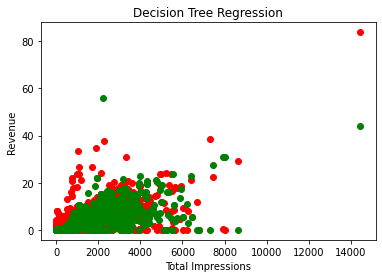

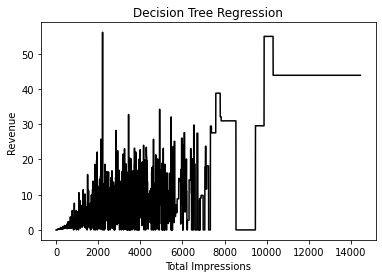

In [ ]:
# Visualising the Decision Tree Regression Results
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, y_pred, color = 'green')
plt.title('Decision Tree Regression')
plt.xlabel('Total Impressions')
plt.ylabel('Revenue')
plt.show()

plt.plot(X_grid, regressor.predict(X_grid), color = 'black')
plt.title('Decision Tree Regression')
plt.xlabel('Total Impressions')
plt.ylabel('Revenue')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(regressor, X, y, cv=3))

[0.31434286 0.18729413 0.30045112]


**Red Neuronal**

In [ ]:
X = dataset["total_impressions"]
print(X)

0         16
1          6
2          4
3          4
4          4
          ..
567286    12
567287    68
567288     2
567289     6
567290    12
Name: total_impressions, Length: 567291, dtype: int64


In [ ]:
y = dataset["total_revenue"]
print(y)

0         0.0000
1         0.0000
2         0.0000
3         0.0000
4         0.0000
           ...  
567286    0.0254
567287    0.3400
567288    0.0046
567289    0.0120
567290    0.0240
Name: total_revenue, Length: 567291, dtype: float64


In [ ]:
import keras
import keras.backend as kb
import tensorflow as tf

In [ ]:
model = keras.Sequential([
                          keras.layers.Dense(3, activation=tf.nn.relu, input_shape=[1]),
                          #keras.layers.Dense(7, activation=tf.nn.relu),
                          #keras.layers.Dense(3, activation=tf.nn.relu),
                          keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(loss='mean_squared_error',
              optimizer=optimizer,
              metrics=['mean_absolute_error','mean_squared_error'])

In [ ]:
model.fit(X,y,epochs=100)

Epoch 1/100
17728/17728 [==============================] - 23s 1ms/step - loss: 1.7888 - mean_absolute_error: 0.1256 - mean_squared_error: 1.7888
Epoch 2/100
17728/17728 [==============================] - 23s 1ms/step - loss: 0.5097 - mean_absolute_error: 0.1159 - mean_squared_error: 0.5097
Epoch 3/100
17728/17728 [==============================] - 23s 1ms/step - loss: 0.5097 - mean_absolute_error: 0.1156 - mean_squared_error: 0.5097
Epoch 4/100
17728/17728 [==============================] - 23s 1ms/step - loss: 0.5098 - mean_absolute_error: 0.1154 - mean_squared_error: 0.5098
Epoch 5/100
17728/17728 [==============================] - 23s 1ms/step - loss: 0.5097 - mean_absolute_error: 0.1159 - mean_squared_error: 0.5097
Epoch 6/100
17728/17728 [==============================] - 23s 1ms/step - loss: 0.5098 - mean_absolute_error: 0.1157 - mean_squared_error: 0.5098
Epoch 7/100
17728/17728 [==============================] - 23s 1ms/step - loss: 0.5097 - mean_absolute_error: 0.1156 - mean_

In [ ]:
model.predict([168])

array([[0.09363025]], dtype=float32)

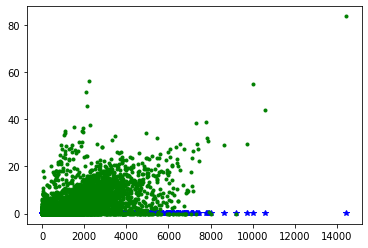

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X,model.predict(X), 'b*', X, y, 'g.')